In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np
from scipy.io import arff
Bikesdf=pd.read_csv('hour.csv')
print(Bikesdf)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1    1/1/2011       1   0     1   0        0        6   
1            2    1/1/2011       1   0     1   1        0        6   
2            3    1/1/2011       1   0     1   2        0        6   
3            4    1/1/2011       1   0     1   3        0        6   
4            5    1/1/2011       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  12/31/2012       1   1    12  19        0        1   
17375    17376  12/31/2012       1   1    12  20        0        1   
17376    17377  12/31/2012       1   1    12  21        0        1   
17377    17378  12/31/2012       1   1    12  22        0        1   
17378    17379  12/31/2012       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [2]:
Bikesdf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
Bikesdf.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
Bikesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
Bikesdf_C_DESC=Bikesdf[['temp','hum','windspeed','casual','registered','cnt']]
Bikesdf_C_DESC.describe()

,temp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
Bikesdf_C=Bikesdf
Bikesdf_C.drop_duplicates(subset="instant",inplace=True)
Bikesdf_C
#NO DUPLICATES FOUND

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
Bikesdf_C.isna()
Bikesdf_C.dropna(inplace=True)
Bikesdf_C
#No null values

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


<Axes: xlabel='cnt', ylabel='Count'>

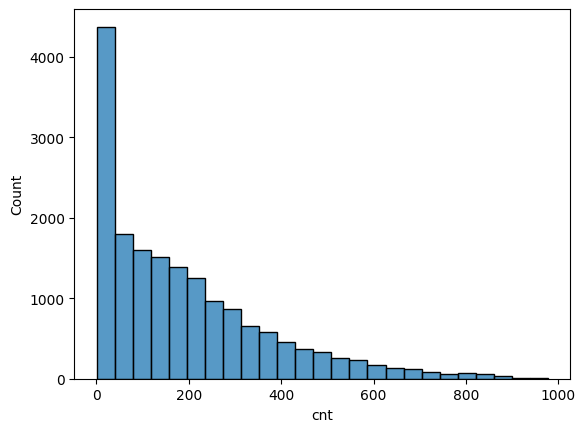

In [8]:
sb.histplot(Bikesdf_C, x='cnt', bins=25)

<Axes: xlabel='registered', ylabel='Count'>

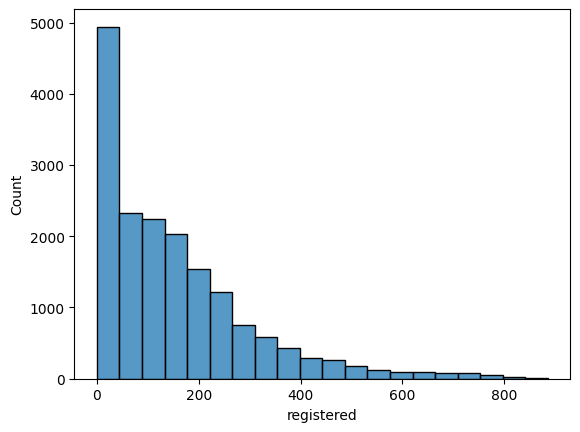

In [9]:
sb.histplot(Bikesdf_C, x='registered', bins=20)

<Axes: xlabel='casual', ylabel='Count'>

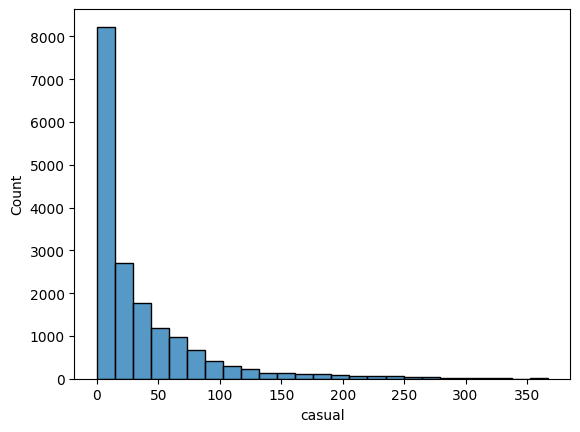

In [10]:
sb.histplot(Bikesdf_C, x='casual', bins=25)

<Axes: xlabel='temp', ylabel='Count'>

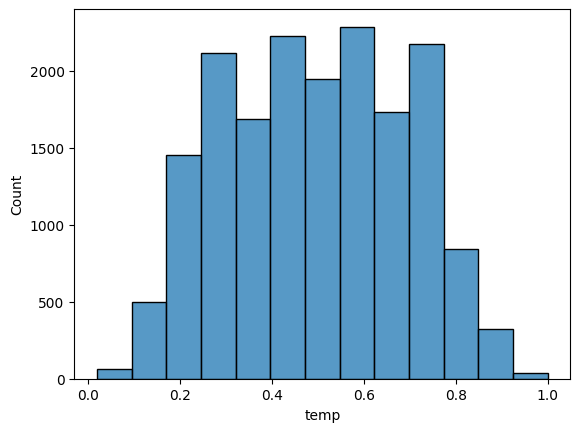

In [11]:
sb.histplot(Bikesdf_C, x='temp', bins=13)

<Axes: xlabel='windspeed', ylabel='Count'>

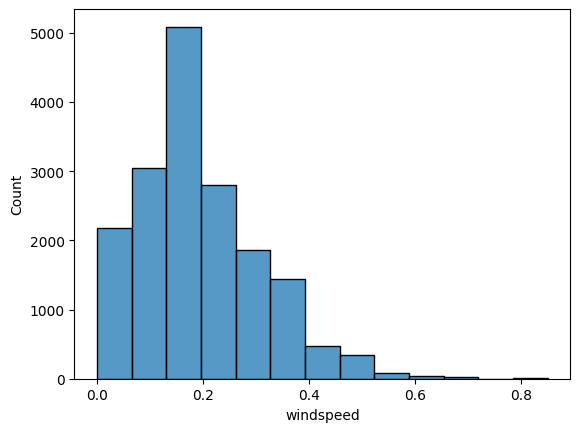

In [12]:
sb.histplot(Bikesdf_C, x='windspeed', bins=13)

<Axes: xlabel='hr', ylabel='cnt'>

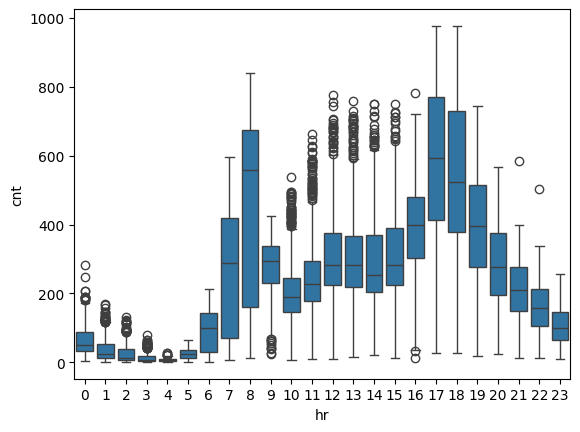

In [14]:
BIKESDF1=Bikesdf_C[Bikesdf_C['yr']==1]
sb.boxplot(data=BIKESDF1, x='hr',y='cnt')

<Axes: xlabel='hr', ylabel='cnt'>

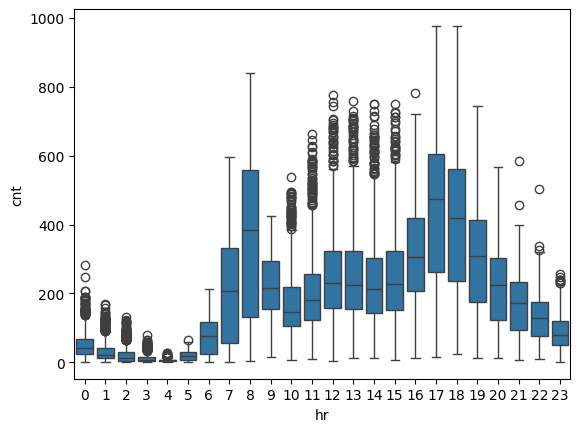

In [15]:
sb.boxplot(data=Bikesdf_C, x='hr',y='cnt')

<Axes: xlabel='hr', ylabel='registered'>

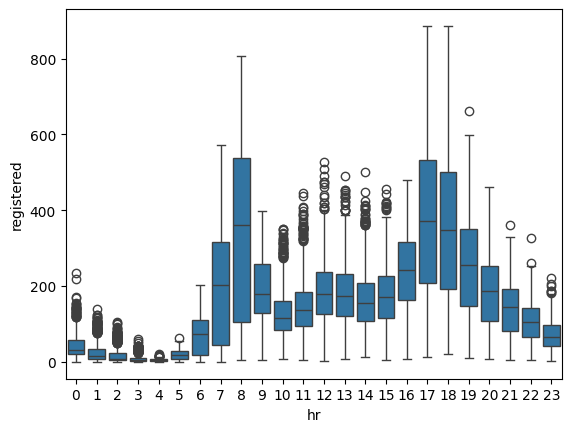

In [16]:
sb.boxplot(data=Bikesdf_C, x='hr',y='registered')

<Axes: xlabel='hr', ylabel='casual'>

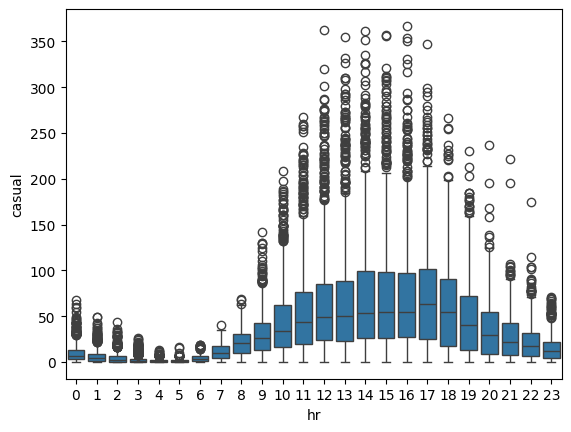

In [17]:
sb.boxplot(data=Bikesdf_C, x='hr',y='casual')

<Axes: xlabel='weekday', ylabel='cnt'>

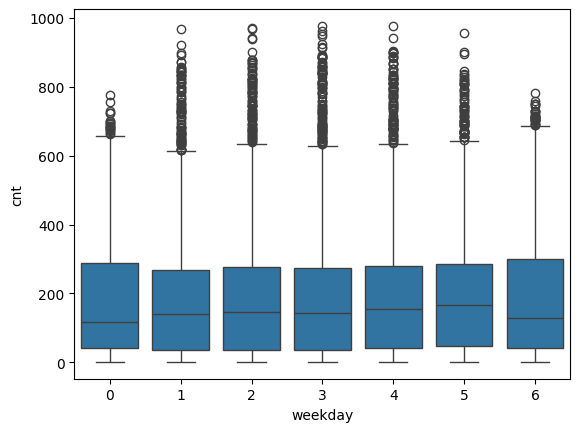

In [18]:
sb.boxplot(data=Bikesdf_C, x='weekday',y='cnt')

<Axes: xlabel='weekday', ylabel='casual'>

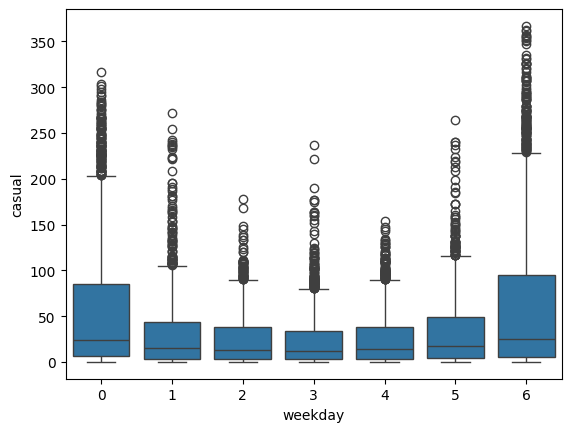

In [19]:
sb.boxplot(data=Bikesdf_C, x='weekday',y='casual')

<Axes: xlabel='mnth', ylabel='cnt'>

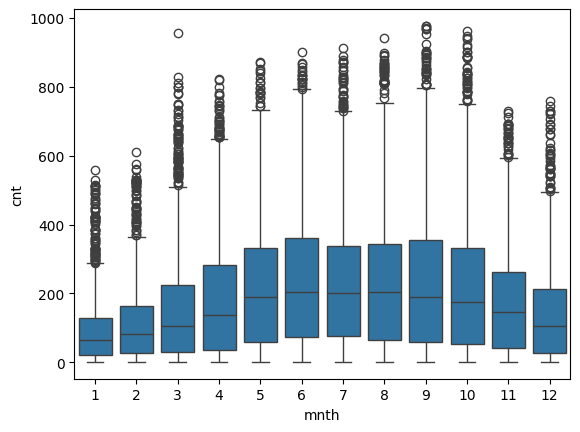

In [20]:
sb.boxplot(data=Bikesdf_C, x='mnth',y='cnt')

<Axes: xlabel='weathersit', ylabel='cnt'>

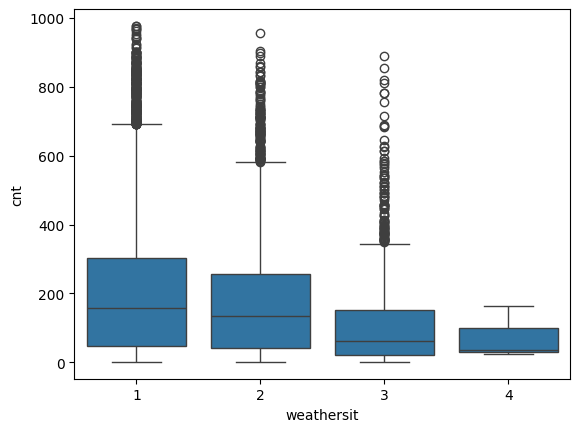

In [21]:
sb.boxplot(data=Bikesdf_C, x='weathersit',y='cnt')

<Axes: >

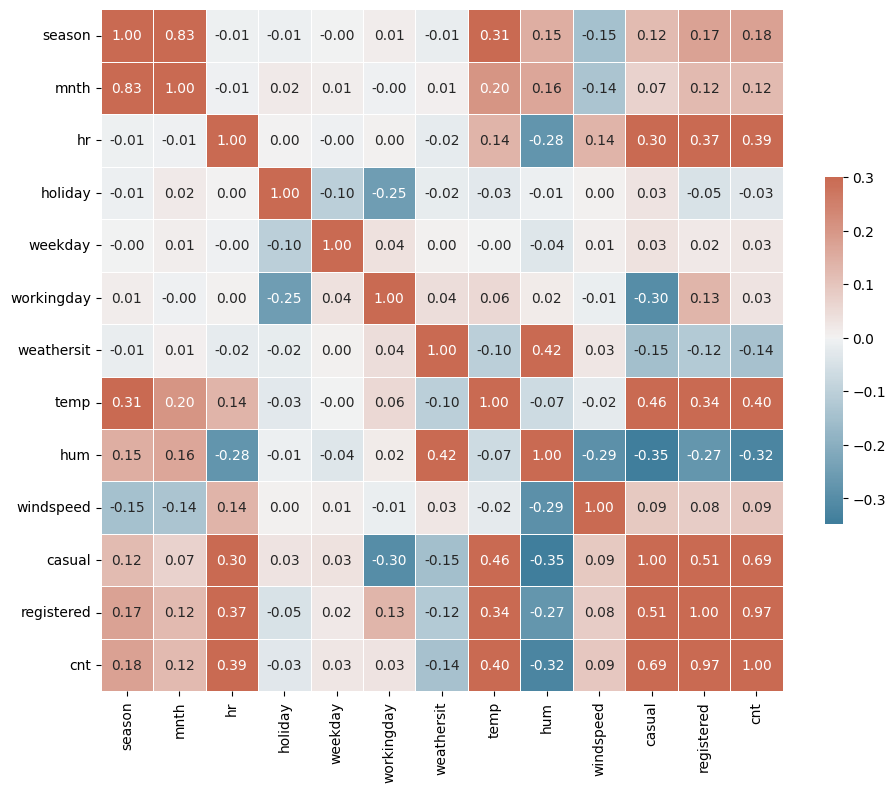

In [22]:
Bikesdf_C_CORR=Bikesdf_C[['season','mnth','hr','holiday','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered','cnt']]
corr=Bikesdf_C_CORR.corr()
f, ax=mp.subplots(figsize=(11,9))
cmap=sb.diverging_palette(230,20,as_cmap=True)
sb.heatmap(corr,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True,fmt=".2f")

In [23]:
BIKES_OUTLIERS_col=Bikesdf_C[['cnt','mnth','hr','holiday','weekday','workingday','weathersit','temp']]
BIKES_OUTLIERS_10=pd.DataFrame(BIKES_OUTLIERS_col[BIKES_OUTLIERS_col['hr']==10])
BIKES_OUTLIERS_10['z_score']=(BIKES_OUTLIERS_10['cnt']-BIKES_OUTLIERS_10['cnt'].mean())/BIKES_OUTLIERS_10['cnt'].std()
print(BIKES_OUTLIERS_10)

       cnt  mnth  hr  holiday  weekday  workingday  weathersit  temp   z_score
10      36     1  10        0        6           0           1  0.38 -1.346979
33      53     1  10        0        0           0           2  0.36 -1.180647
55      44     1  10        0        1           1           1  0.18 -1.268705
78      42     1  10        0        2           1           2  0.16 -1.288273
101     57     1  10        0        3           1           1  0.22 -1.141510
...    ...   ...  ..      ...      ...         ...         ...   ...       ...
17269   75    12  10        0        4           1           1  0.28 -0.965394
17293  162    12  10        0        5           1           2  0.26 -0.114167
17317   41    12  10        0        6           0           3  0.26 -1.298057
17341  122    12  10        0        0           0           1  0.26 -0.505536
17365  120    12  10        0        1           1           2  0.20 -0.525104

[727 rows x 9 columns]


In [24]:
OUTLIERS_10 =BIKES_OUTLIERS_10[np.abs(BIKES_OUTLIERS_10['z_score']) > 2]
OUTLIERS_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 10471 to 16168
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cnt         49 non-null     int64  
 1   mnth        49 non-null     int64  
 2   hr          49 non-null     int64  
 3   holiday     49 non-null     int64  
 4   weekday     49 non-null     int64  
 5   workingday  49 non-null     int64  
 6   weathersit  49 non-null     int64  
 7   temp        49 non-null     float64
 8   z_score     49 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 3.8 KB


<Axes: xlabel='hr', ylabel='cnt'>

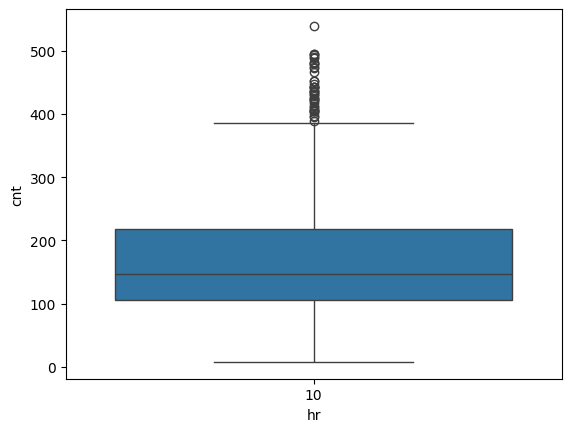

In [25]:
sb.boxplot(data=BIKES_OUTLIERS_10, x='hr',y='cnt')

<Axes: xlabel='hr', ylabel='ValorW'>

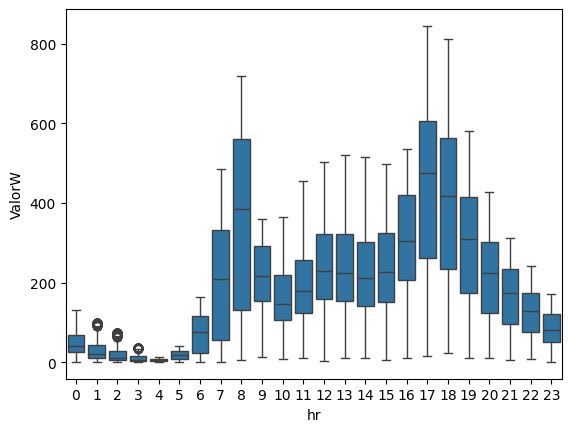

In [26]:
#Winsorización
quan05 = Bikesdf_C.groupby('hr')['cnt'].transform(lambda x: x.quantile(0))
quan95 = Bikesdf_C.groupby('hr')['cnt'].transform(lambda x: x.quantile(0.932))
Bikesdf_C['ValorW'] = Bikesdf_C['cnt'].clip(lower=quan05, upper=quan95)
sb.boxplot(data=Bikesdf_C, x='hr',y='ValorW')

<Axes: xlabel='hr', ylabel='cnt'>

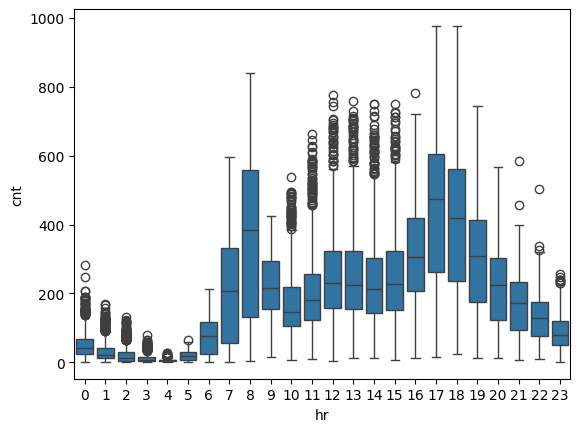

In [27]:
sb.boxplot(data=Bikesdf_C, x='hr',y='cnt')

In [ ]:
#Se procede con realizar el estudio de 3 bancos principales
#Mañana -> 6:00 a 10:00
#Tarde -> 15:00 a 20:00
#Medio día -> 11:00 a 14:00
COND=[
    (Bikesdf_C['hr']<=10) & (Bikesdf_C['hr']>=5),
    (Bikesdf_C['hr']<=14) & (Bikesdf_C['hr']>=11),
    (Bikesdf_C['hr']<=20) & (Bikesdf_C['hr']>=15)]
RSLT=['Manana', 'MedioDia', 'Tarde']
Bikesdf_C['banco']=np.select(COND,RSLT, default="Noche")
#Bikesdf_C['banco']= Bikesdf_C['hr'].apply(lambda x: 'Mañana' if (x<=10 & x>=6) else('MedioDia' if (x<=14 & x>=11) else('Tarde' if (x<=20 & x>=15) else 'Noche')))
Bikesdf_C.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ValorW,banco
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,16.0,Noche
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,40.0,Noche
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32.0,Noche
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,13.0,Noche
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.0,Noche
5,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,1.0,Noche
6,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,2.0,Manana
7,8,1/1/2011,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,3.0,Manana
8,9,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,8.0,Manana
9,10,1/1/2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,14.0,Manana


In [61]:
CAP_BIKESHARES=pd.DataFrame(Bikesdf_C[['dteday','yr','mnth','hr','weekday','weathersit','temp','windspeed','ValorW', 'banco']])
Bikesdf_C.to_csv('CAPITAL_BIKESHARES.csv', index=False)

In [62]:
CAP_BIKESHARES['dteday'] = pd.to_datetime(CAP_BIKESHARES['dteday'], format='%m/%d/%Y')
CAP_BIKESHARES['HORATIEMPO'] = pd.to_timedelta(CAP_BIKESHARES['hr'], unit='h')
#CAP_BIKESHARES['dteday'] = CAP_BIKESHARES['dteday'].dt.strftime('%Y-%-m-%-d')
#CAP_BIKESHARES['dteday'] = pd.to_datetime(CAP_BIKESHARES['dteday'], format='%m-%d-%Y')
CAP_BIKESHARES.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   dteday      17379 non-null  datetime64[ns] 
 1   yr          17379 non-null  int64          
 2   mnth        17379 non-null  int64          
 3   hr          17379 non-null  int64          
 4   weekday     17379 non-null  int64          
 5   weathersit  17379 non-null  int64          
 6   temp        17379 non-null  float64        
 7   windspeed   17379 non-null  float64        
 8   ValorW      17379 non-null  float64        
 9   banco       17379 non-null  object         
 10  HORATIEMPO  17379 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(1), timedelta64[ns](1)
memory usage: 1.5+ MB


In [63]:

CAP_BIKESHARES['FechaHora'] = CAP_BIKESHARES['dteday'].dt.normalize() + CAP_BIKESHARES['HORATIEMPO']

In [39]:
CAP_BIKESHARES.head()

,dteday,mnth,hr,weekday,weathersit,temp,windspeed,ValorW,banco,HORATIEMPO,FechaHora
0,2011-01-01,1,0,6,1,0.24,0.0,16.0,Noche,0 days 00:00:00,2011-01-01 00:00:00
1,2011-01-01,1,1,6,1,0.22,0.0,40.0,Noche,0 days 01:00:00,2011-01-01 01:00:00
2,2011-01-01,1,2,6,1,0.22,0.0,32.0,Noche,0 days 02:00:00,2011-01-01 02:00:00
3,2011-01-01,1,3,6,1,0.24,0.0,13.0,Noche,0 days 03:00:00,2011-01-01 03:00:00
4,2011-01-01,1,4,6,1,0.24,0.0,1.0,Noche,0 days 04:00:00,2011-01-01 04:00:00


In [79]:
CAP_BIKESHARES_PRINT=CAP_BIKESHARES[['FechaHora','yr','mnth','hr','weekday','weathersit','temp','windspeed','ValorW', 'banco']]


In [ ]:
CAP_BIKESHARES_PRINT=CAP_BIKESHARES_PRINT[(CAP_BIKESHARES_PRINT['yr']==1) & (CAP_BIKESHARES_PRINT['mnth']<=10) & (CAP_BIKESHARES_PRINT['mnth']>=8)]
CAP_BIKESHARES_PRINT.to_csv('CAPITAL_BIKESHARES.csv', index=False)

In [72]:
CapBikesMorning=CAP_BIKESHARES_PRINT[(CAP_BIKESHARES_PRINT['banco']=='Manana') & (CAP_BIKESHARES_PRINT['yr']==1) & (CAP_BIKESHARES_PRINT['mnth']<=10) & (CAP_BIKESHARES_PRINT['mnth']>=8)]
#CapBikesMorning=CapBikesMorning[CapBikesMorning['yr']==1]
CapBikesMorning.to_csv('Banco_Manana.csv', index=False)

In [82]:
CapBikesMidday=CAP_BIKESHARES_PRINT[(CAP_BIKESHARES_PRINT['banco']=='MedioDia') & (CAP_BIKESHARES_PRINT['yr']==1) & (CAP_BIKESHARES_PRINT['mnth']<=10) & (CAP_BIKESHARES_PRINT['mnth']>=8)]
#CapBikesMidday=CapBikesMidday[CapBikesMidday['yr']==1]
CapBikesMidday.to_csv('Banco_MedioDia.csv', index=False)

In [83]:
CapBikesAfternoon=CAP_BIKESHARES_PRINT[(CAP_BIKESHARES_PRINT['banco']=='Tarde') & (CAP_BIKESHARES_PRINT['yr']==1) & (CAP_BIKESHARES_PRINT['mnth']<=10) & (CAP_BIKESHARES_PRINT['mnth']>=8)]
#CapBikesAfternoon=CapBikesAfternoon[CapBikesAfternoon['yr']==1]
CapBikesAfternoon.to_csv('Banco_Tarde.csv', index=False)

In [46]:
! pip install scipy

'pip' is not recognized as an internal or external command,
operable program or batch file.
